<a href="https://colab.research.google.com/github/SolovevDR/NIR/blob/main/vectorize_and_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/NIR')



---
---
---



In [2]:
import pandas as pd
import numpy as np
 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder 

In [3]:
my_df = pd.read_csv('DICT_FOR_LEARN.csv', header= 0, sep=';')

In [4]:
copy_df = my_df[['number_availability', 'status_code', 'size_object']].copy()

In [5]:
# import seaborn as sns
# sns.pairplot(copy_df)

In [6]:
copy_df.columns

Index(['number_availability', 'status_code', 'size_object'], dtype='object')

In [7]:
my_df.columns

Index(['Unnamed: 0', 'ip', 'country', 'continent', 'timezone', 'datetime',
       'method', 'url_path', 'number_availability', 'http', 'status_code',
       'size_object', 'exit_system', 'os', 'browser', 'device', 'markup'],
      dtype='object')

In [8]:
print(len(my_df['method'].unique()), ' ', my_df['method'].unique())
print(my_df['method'].value_counts())

3   ['GET' 'POST' 'HEAD']
GET     11524
POST      115
HEAD        4
Name: method, dtype: int64


count     11643.000000
mean      28408.875290
std       29391.491049
min           0.000000
25%        8311.000000
50%       28941.000000
75%       28941.000000
max      357385.000000
Name: size_object, dtype: float64

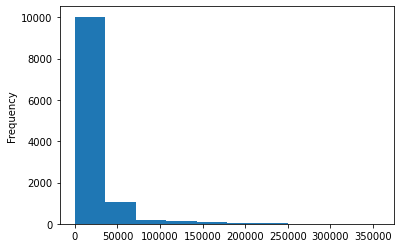

In [9]:
my_df['size_object'].plot(kind='hist')
my_df['size_object'].describe()

видно, что данные имеют, большой разброс. Требуют маштабирования. 

0    0.001884
1    0.001884
2    0.001884
3    0.001884
4    0.001884
Name: size_object, dtype: float64


count    11643.000000
mean         0.006441
std          0.006664
min          0.000000
25%          0.001884
50%          0.006562
75%          0.006562
max          0.081028
Name: size_object, dtype: float64

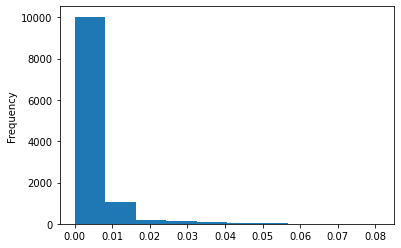

In [10]:
from sklearn import preprocessing

x_array = np.array(my_df['size_object'])
normalized_arr = preprocessing.normalize([x_array])
normalized_arr = normalized_arr[0]

my_df['size_object'] = normalized_arr
print(my_df['size_object'].head())
my_df['size_object'].plot(kind='hist')
my_df['size_object'].describe()

count    11643.000000
mean         0.006441
std          0.006664
min          0.000000
25%          0.001884
50%          0.006562
75%          0.006562
max          0.081028
Name: size_object, dtype: float64

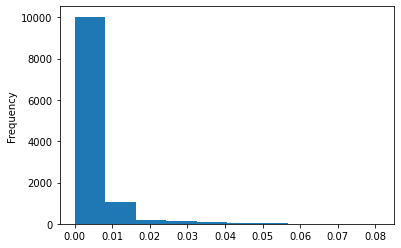

In [11]:
my_df['size_object'].plot(kind='hist')
my_df['size_object'].describe()

count    11643.000000
mean       204.260242
std         26.915227
min        200.000000
25%        200.000000
50%        200.000000
75%        200.000000
max        503.000000
Name: status_code, dtype: float64

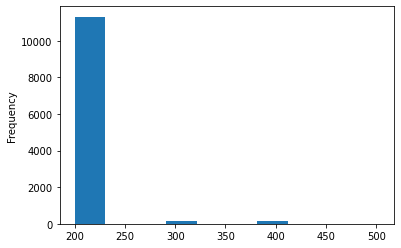

In [12]:
my_df['status_code'].plot(kind='hist')
my_df['status_code'].describe()

In [13]:
print(my_df['number_availability'].value_counts())
print(my_df['number_availability'].unique())

0    10598
1     1045
Name: number_availability, dtype: int64
[0 1]


In [14]:
my_df['url_path']

0                  None
1                  None
2                  None
3                  None
4                  None
              ...      
11638      css hint css
11639      img logo png
11640    img debian png
11641    img ubuntu png
11642    img centos png
Name: url_path, Length: 11643, dtype: object

In [15]:
from sklearn.pipeline import FeatureUnion

# Index(['Unnamed: 0', 'ip', 'country', 'continent', 'timezone', 'datetime',
#        'method', 'url_path', 'number_availability', 'http', 'status_code',
#        'size_object', 'exit_system', 'os', 'browser', 'device', 'markup'],
#       dtype='object')

vectorizer = CountVectorizer(max_features = 100)
X1 = vectorizer.fit_transform(my_df['url_path']).toarray()

encoder = OneHotEncoder()

country_encoded, country_categories = my_df['country'].factorize()
contry_cat_lhot = encoder.fit_transform(country_encoded.reshape(-1 ,1))
X2 = contry_cat_lhot.toarray()

continent_encoded, continent_categories = my_df['continent'].factorize()
continent_cat_lhot = encoder.fit_transform(continent_encoded.reshape(-1 ,1))
X3 = continent_cat_lhot.toarray()

method_encoded, method_categories = my_df['method'].factorize()
method_cat_lhot = encoder.fit_transform(method_encoded.reshape(-1 ,1))
X4 = method_cat_lhot.toarray()

http_encoded, http_categories = my_df['http'].factorize()
http_cat_lhot = encoder.fit_transform(http_encoded.reshape(-1 ,1))
X5 = http_cat_lhot.toarray()

exit_system_encoded, exit_system_categories = my_df['exit_system'].factorize()
exit_system_cat_lhot = encoder.fit_transform(exit_system_encoded.reshape(-1 ,1))
X6 = exit_system_cat_lhot.toarray()

os_encoded, os_categories = my_df['os'].factorize()
os_cat_lhot = encoder.fit_transform(os_encoded.reshape(-1 ,1))
X7 = os_cat_lhot.toarray()

browser_encoded, browser_categories = my_df['browser'].factorize()
browser_cat_lhot = encoder.fit_transform(browser_encoded.reshape(-1 ,1))
X8 = browser_cat_lhot.toarray()

device_encoded, device_categories = my_df['device'].factorize()
device_cat_lhot = encoder.fit_transform(device_encoded.reshape(-1 ,1))
X9 = device_cat_lhot.toarray()

# markup_encoded, markup_categories = my_df['markup'].factorize()
# markup_cat_lhot = encoder.fit_transform(markup_encoded.reshape(-1 ,1))
# y = markup_cat_lhot.toarray()


In [16]:
# copy_df['url_path'] = X1
# copy_df['country'] = X2
# copy_df['continent'] = X3
# copy_df['method'] = X4
# copy_df['http'] = X5
# copy_df['exit_system'] = X6
# copy_df['os'] = X7
# copy_df['browser'] = X8
# copy_df['device'] = X9

In [17]:
import datetime as dt

dates = pd.DataFrame(my_df['datetime'].str.extractall('(\d+)').unstack().values[:,:-1].astype(int), columns=["year", "month", "day", "hour", "minute", "second"])
my_df["new_datetime"] = pd.to_datetime(dates)
mY_df = my_df.drop("datetime", axis=1)

print(my_df['new_datetime'].head())

my_df['year'] = my_df['new_datetime'].dt.year
my_df['month'] = my_df['new_datetime'].dt.month
my_df['day'] = my_df['new_datetime'].dt.day
my_df['hour'] = my_df['new_datetime'].dt.hour
my_df['minute'] = my_df['new_datetime'].dt.minute
my_df['second'] = my_df['new_datetime'].dt.second

my_df.info()

0   2021-11-03 11:00:03
1   2021-11-03 11:00:15
2   2021-11-03 11:00:16
3   2021-11-03 11:00:17
4   2021-11-03 11:00:17
Name: new_datetime, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11643 entries, 0 to 11642
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           11643 non-null  int64         
 1   ip                   11643 non-null  object        
 2   country              11642 non-null  object        
 3   continent            9999 non-null   object        
 4   timezone             11642 non-null  object        
 5   datetime             11643 non-null  object        
 6   method               11643 non-null  object        
 7   url_path             11643 non-null  object        
 8   number_availability  11643 non-null  int64         
 9   http                 11643 non-null  object        
 10  status_code          11643 non-null  int

In [18]:

my_df = my_df.join([pd.DataFrame(X1, columns=(f'url_path_{i}' for i in range(X1.shape[1])))])
my_df = my_df.join([pd.DataFrame(X2, columns=(f'country_{i}' for i in range(X2.shape[1])))])
my_df = my_df.join([pd.DataFrame(X3, columns=(f'continent_{i}' for i in range(X3.shape[1])))])
my_df = my_df.join([pd.DataFrame(X4, columns=(f'method_{i}' for i in range(X4.shape[1])))])
my_df = my_df.join([pd.DataFrame(X5, columns=(f'http_{i}' for i in range(X5.shape[1])))])
my_df = my_df.join([pd.DataFrame(X6, columns=(f'exit_system_{i}' for i in range(X6.shape[1])))])
my_df = my_df.join([pd.DataFrame(X7, columns=(f'os_{i}' for i in range(X7.shape[1])))])
my_df = my_df.join([pd.DataFrame(X8, columns=(f'browser_{i}' for i in range(X8.shape[1])))])
my_df = my_df.join([pd.DataFrame(X9, columns=(f'device_{i}' for i in range(X9.shape[1])))])
# my_df = my_df.join([pd.DataFrame(y, columns=(f'markup_{i}' for i in range(y.shape[1])))])

print(my_df.head)

<bound method NDFrame.head of        Unnamed: 0              ip country continent             timezone  \
0               0  155.94.228.201      US       NaN  America/Los_Angeles   
1               1  136.243.34.253      DE        EU                 None   
2               2  155.94.228.201      US       NaN  America/Los_Angeles   
3               3  136.243.34.253      DE        EU                 None   
4               4  136.243.34.253      DE        EU                 None   
...           ...             ...     ...       ...                  ...   
11638       11638   94.41.137.171      RU        EU   Asia/Yekaterinburg   
11639       11639   94.41.137.171      RU        EU   Asia/Yekaterinburg   
11640       11640   94.41.137.171      RU        EU   Asia/Yekaterinburg   
11641       11641   94.41.137.171      RU        EU   Asia/Yekaterinburg   
11642       11642   94.41.137.171      RU        EU   Asia/Yekaterinburg   

                                                datetime 

In [19]:
del my_df['ip']
del my_df['timezone']
del my_df['country']
del my_df['continent']
del my_df['method']
del my_df['http']
del my_df['exit_system']
del my_df['os']
del my_df['browser']
del my_df['device']
del my_df['new_datetime']
del my_df['url_path']
copy_markup = my_df['markup'].tolist()
del my_df['markup']
del my_df['datetime']
del my_df['Unnamed: 0']
my_df['markup'] = copy_markup



In [20]:
number_input_parameters = len(my_df.columns) - 1

In [21]:
from sklearn.model_selection import train_test_split
x = my_df.iloc[:,0:number_input_parameters]
y = my_df.iloc[:,number_input_parameters:]
#x = x.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

In [22]:
X_train_numpy

array([[0.00000000e+00, 2.00000000e+02, 5.41804037e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+02, 1.07943634e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.01000000e+02, 3.67294028e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.00000000e+02, 6.56163980e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+02, 6.56163980e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+02, 4.62110302e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [23]:
X_train


,number_availability,status_code,size_object,year,month,day,hour,minute,second,url_path_0,...,device_102,device_103,device_104,device_105,device_106,device_107,device_108,device_109,device_110,device_111
7388,0,200,0.005418,2021,11,3,14,57,42,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10609,0,200,0.001079,2021,11,3,16,22,23,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9480,0,301,0.000037,2021,11,3,15,47,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,0,200,0.006562,2021,11,3,11,5,53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5785,1,200,0.027561,2021,11,3,14,3,48,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,404,0.000102,2021,11,3,16,35,51,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0,200,0.006562,2021,11,3,11,11,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0,200,0.006562,2021,11,3,11,11,41,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0,200,0.006562,2021,11,3,11,1,29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
columns = my_df.columns
for i in columns:
  print(i)

number_availability
status_code
size_object
year
month
day
hour
minute
second
url_path_0
url_path_1
url_path_2
url_path_3
url_path_4
url_path_5
url_path_6
url_path_7
url_path_8
url_path_9
url_path_10
url_path_11
url_path_12
url_path_13
url_path_14
url_path_15
url_path_16
url_path_17
url_path_18
url_path_19
url_path_20
url_path_21
url_path_22
url_path_23
url_path_24
url_path_25
url_path_26
url_path_27
url_path_28
url_path_29
url_path_30
url_path_31
url_path_32
url_path_33
url_path_34
url_path_35
url_path_36
url_path_37
url_path_38
url_path_39
url_path_40
url_path_41
url_path_42
url_path_43
url_path_44
url_path_45
url_path_46
url_path_47
url_path_48
url_path_49
url_path_50
url_path_51
url_path_52
url_path_53
url_path_54
url_path_55
url_path_56
url_path_57
url_path_58
url_path_59
url_path_60
url_path_61
url_path_62
url_path_63
url_path_64
url_path_65
url_path_66
url_path_67
url_path_68
url_path_69
url_path_70
url_path_71
url_path_72
url_path_73
url_path_74
url_path_75
url_path_76
url_path



---



---



---

### Тут плохо подобраны модели

### Пока не нужно на это смотреть

In [25]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

### Бинарная метрика без скрытых слоев
### Поиск наилучшей функции активации 
### Функция ошибки mean_squared_error
(20 эпох)

Epoch 1/20
199/199 [==============================] - 3s 7ms/step - loss: 2.5630 - binary_accuracy: 0.4790 - val_loss: 2.6154 - val_binary_accuracy: 0.4615
Epoch 2/20
199/199 [==============================] - 1s 5ms/step - loss: 2.5630 - binary_accuracy: 0.4790 - val_loss: 2.6154 - val_binary_accuracy: 0.4615
Epoch 3/20
199/199 [==============================] - 1s 6ms/step - loss: 2.5630 - binary_accuracy: 0.4790 - val_loss: 2.6154 - val_binary_accuracy: 0.4615
Epoch 4/20
199/199 [==============================] - 1s 6ms/step - loss: 2.5630 - binary_accuracy: 0.4790 - val_loss: 2.6154 - val_binary_accuracy: 0.4615
Epoch 5/20
199/199 [==============================] - 1s 6ms/step - loss: 2.5630 - binary_accuracy: 0.4790 - val_loss: 2.6154 - val_binary_accuracy: 0.4615
Epoch 6/20
199/199 [==============================] - 1s 7ms/step - loss: 2.5630 - binary_accuracy: 0.4790 - val_loss: 2.6154 - val_binary_accuracy: 0.4615
Epoch 7/20
199/199 [==============================] - 1s 6ms/ste

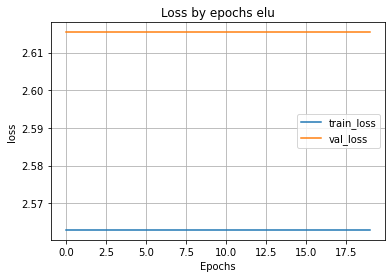

los: 2.525190830230713
accuracy: 0.4916030466556549
[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]
--------------------
softmax :


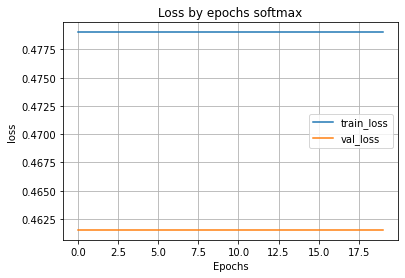

los: 0.4916030466556549
accuracy: 0.5083969235420227
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
--------------------
selu :


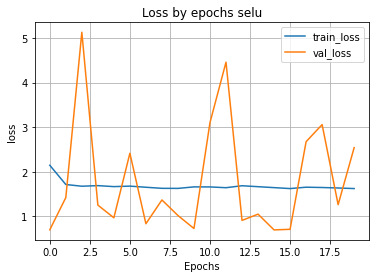

los: 2.246912717819214
accuracy: 0.4917939007282257
[[-1.46552   ]
 [-1.4634818 ]
 [ 0.0743812 ]
 ...
 [-1.4594948 ]
 [-0.53738034]
 [-0.7563325 ]]
--------------------
softplus :


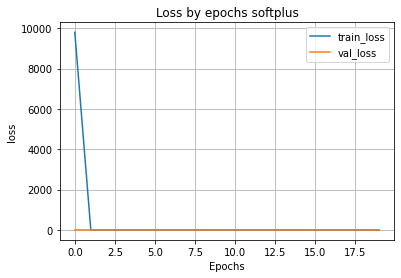

los: 0.47102680802345276
accuracy: 0.4916030466556549
[[0.00215748]
 [0.0016559 ]
 [0.03492797]
 ...
 [0.00170127]
 [0.03696346]
 [0.02507335]]
--------------------
softsign :


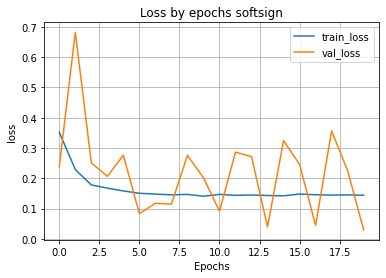

los: 0.028131598606705666
accuracy: 0.9853053689002991
[[ 0.14525928]
 [-0.36742088]
 [ 0.952695  ]
 ...
 [ 0.06564572]
 [ 0.9445418 ]
 [ 0.934363  ]]
--------------------
relu :


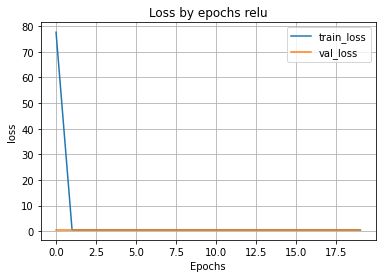

los: 0.5083969235420227
accuracy: 0.4916030466556549
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
--------------------
tanh :


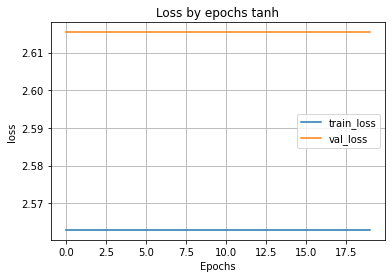

los: 2.525190830230713
accuracy: 0.4916030466556549
[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]
--------------------
sigmoid :


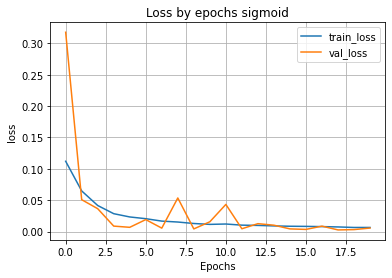

los: 0.003224663669243455
accuracy: 0.9963740706443787
[[0.01008263]
 [0.00143734]
 [0.99996483]
 ...
 [0.00452366]
 [0.9999867 ]
 [0.9587008 ]]
--------------------
hard_sigmoid :


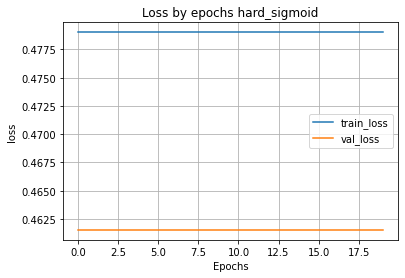

los: 0.4916030466556549
accuracy: 0.5083969235420227
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
--------------------
exponential :


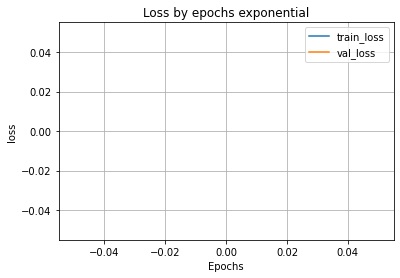

los: nan
accuracy: 0.4916030466556549
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
--------------------
linear :


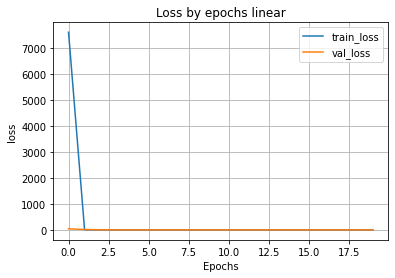

los: 1.0493074655532837
accuracy: 0.5083969235420227
[[0.99041146]
 [0.9701306 ]
 [2.10134   ]
 ...
 [0.9932172 ]
 [2.1109283 ]
 [1.7995794 ]]
--------------------


In [26]:
from threading import active_count
activation_list = ['elu', 'softmax', 'selu', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'exponential', 'linear']
los_list_20epochs = []
accuracy_list_20epochs = []
model_list_20epochs = []
spis_labels = []

for i in activation_list:
    # 1. создаем модель - объявляем ее объектом класса Sequential
    model_binary_1layer = Sequential()
    # 2. добавляем выходной слой
    model_binary_1layer.add(Dense( units=1, input_dim=number_input_parameters, activation=i))
    # 3. компилируем модель
    model_binary_1layer.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['binary_accuracy'])

    H = model_binary_1layer.fit(X_train_numpy, y_train_numpy, validation_split=0.01, epochs=20)
    model_list_20epochs.append(H)

    # Оценка качества работы модели на тестовых данных
    scores = model_binary_1layer.evaluate(X_test_numpy, y_test_numpy)
    los_list_20epochs.append(scores[0])
    accuracy_list_20epochs.append(scores[1])

    spis_labels.append(model_binary_1layer.predict(X_test_numpy))

for i in range(len(activation_list)):
    print(activation_list[i], ':')

    plt.plot(model_list_20epochs[i].history['loss'])
    plt.plot(model_list_20epochs[i].history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend(['train_loss', 'val_loss'])
    plt.title('Loss by epochs ' + activation_list[i])
    plt.show()

    print('los: '+ str(los_list_20epochs[i]))
    print('accuracy: ' + str(accuracy_list_20epochs[i]))
    # conf_matrix = confusion_matrix(y_test_numpy, spis_labels[i])
    print(spis_labels[i])
    # print(conf_matrix)
    print('-'*20)

In [27]:
for j in range(len(spis_labels[i])):
  print(spis_labels[0][j], spis_labels[1][j], spis_labels[2][j], spis_labels[3][j], spis_labels[4][j], spis_labels[5][j],
          spis_labels[6][j], spis_labels[7][j], spis_labels[8][j], spis_labels[9][j], spis_labels[10][j])

print(activation_list[0], activation_list[1], activation_list[2], activation_list[3], activation_list[4], activation_list[5], activation_list[6],
      activation_list[7], activation_list[8], activation_list[9], activation_list[10])

Выходные данные были обрезаны до нескольких последних строк (5000).
[-1.] [1.] [-0.59729224] [0.04907937] [0.94365954] [0.] [-1.] [0.9999936] [1.] [nan] [2.1249902]
[-1.] [1.] [-0.5561787] [0.02209385] [0.9119391] [0.] [-1.] [0.96846735] [1.] [nan] [1.9440582]
[-1.] [1.] [-1.4866902] [0.00132093] [0.1199513] [0.] [-1.] [0.00663733] [1.] [nan] [1.0096238]
[-1.] [1.] [-1.4517428] [0.00107795] [-0.17811365] [0.] [-1.] [0.00107843] [1.] [nan] [1.050051]
[-1.] [1.] [-0.6102907] [0.05438239] [0.94419897] [0.] [-1.] [0.99831426] [1.] [nan] [1.9106514]
[-1.] [1.] [-0.05728698] [0.0448397] [0.9356289] [0.] [-1.] [0.99996537] [1.] [nan] [2.181712]
[-1.] [1.] [-0.3245203] [0.04895789] [0.94303244] [0.] [-1.] [0.99986863] [1.] [nan] [2.1308398]
[-1.] [1.] [-0.5211567] [0.0356317] [0.9394645] [0.] [-1.] [0.99819267] [1.] [nan] [1.9337189]
[-1.] [1.] [-0.7689378] [0.02534347] [0.91018623] [0.] [-1.] [0.9627646] [1.] [nan] [1.9587343]
[-1.] [1.] [-1.3927338] [0.00362377] [0.5019443] [0.] [-1.] [0.045

### Бинарная метрика без скрытых слоев
### Поиск наилучшей функции активации 
### Функция ошибки mean_squared_error
(100 эпох)

Epoch 1/100
199/199 [==============================] - 10s 14ms/step - loss: 19.1650 - binary_accuracy: 0.6074 - val_loss: 1.4490 - val_binary_accuracy: 0.6154
Epoch 2/100
199/199 [==============================] - 0s 2ms/step - loss: 1.6570 - binary_accuracy: 0.5768 - val_loss: 1.7669 - val_binary_accuracy: 0.4615
Epoch 3/100
199/199 [==============================] - 1s 4ms/step - loss: 1.4395 - binary_accuracy: 0.5819 - val_loss: 2.5149 - val_binary_accuracy: 0.4615
Epoch 4/100
199/199 [==============================] - 0s 2ms/step - loss: 1.4091 - binary_accuracy: 0.5828 - val_loss: 2.4002 - val_binary_accuracy: 0.4615
Epoch 5/100
199/199 [==============================] - 1s 3ms/step - loss: 1.3366 - binary_accuracy: 0.5854 - val_loss: 0.4083 - val_binary_accuracy: 0.9077
Epoch 6/100
199/199 [==============================] - 0s 2ms/step - loss: 1.2749 - binary_accuracy: 0.5999 - val_loss: 2.1611 - val_binary_accuracy: 0.4615
Epoch 7/100
199/199 [==============================] - 

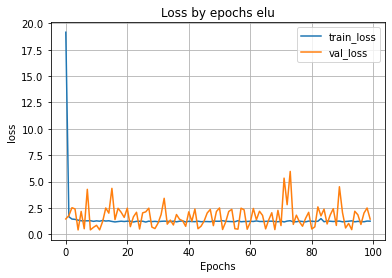

los: 1.3308812379837036
accuracy: 0.5190839767456055
--------------------
softmax :


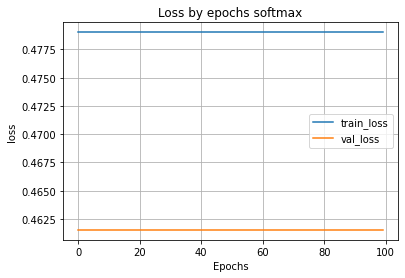

los: 0.4916030466556549
accuracy: 0.5083969235420227
--------------------
selu :


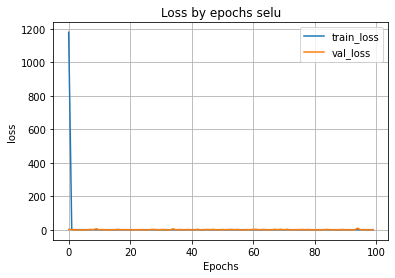

los: 1.4212192296981812
accuracy: 0.49522900581359863
--------------------
softplus :


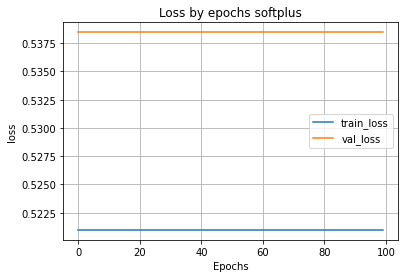

los: 0.5083969235420227
accuracy: 0.4916030466556549
--------------------
softsign :


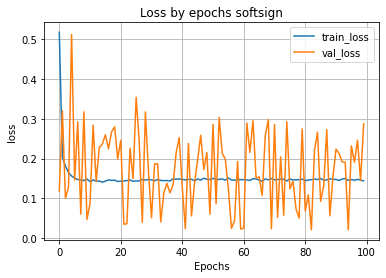

los: 0.3065538704395294
accuracy: 0.5083969235420227
--------------------
relu :


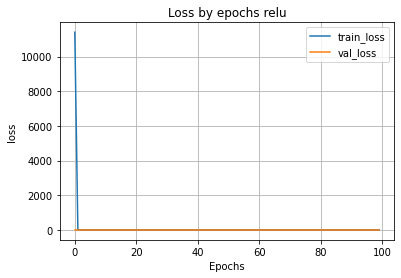

los: 0.5083969235420227
accuracy: 0.4916030466556549
--------------------
tanh :


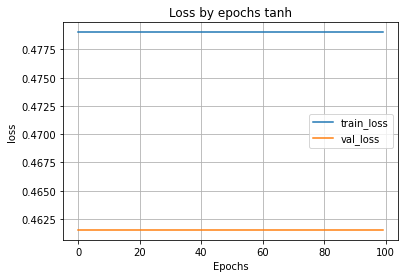

los: 0.4916030466556549
accuracy: 0.5083969235420227
--------------------
sigmoid :


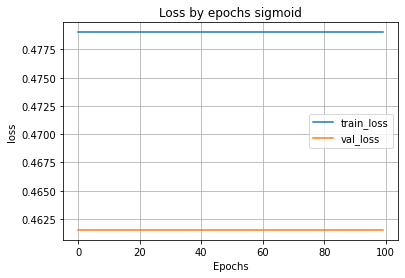

los: 0.4916030466556549
accuracy: 0.5083969235420227
--------------------
hard_sigmoid :


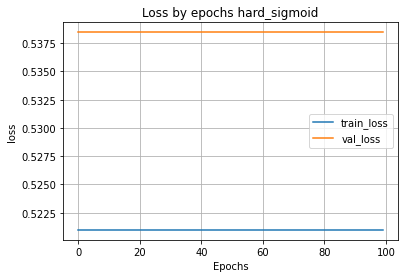

los: 0.5083969235420227
accuracy: 0.4916030466556549
--------------------
exponential :


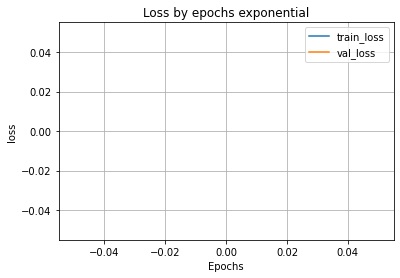

los: nan
accuracy: 0.4916030466556549
--------------------
linear :


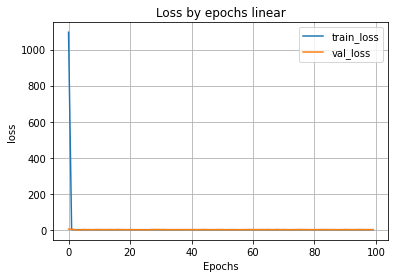

los: 1.4861923456192017
accuracy: 0.4917939007282257
--------------------


In [28]:
los_list_100epochs = []
accuracy_list_100epochs = []
model_list_100epochs = []
time_predict_list = []

for i in activation_list:
    # 1. создаем модель - объявляем ее объектом класса Sequential
    model_binary_1layer = Sequential()
    # 2. добавляем выходной слой
    model_binary_1layer.add(Dense( units=1, input_dim=number_input_parameters, activation=i))
    # 3. компилируем модель
    model_binary_1layer.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['binary_accuracy'])

    H = model_binary_1layer.fit(X_train_numpy, y_train_numpy, validation_split=0.01, epochs=100)
    model_list_100epochs.append(H)

    # Оценка качества работы модели на тестовых данных
    scores = model_binary_1layer.evaluate(X_test_numpy, y_test_numpy)
    los_list_100epochs.append(scores[0])
    accuracy_list_100epochs.append(scores[1])
    time_predict_list.append(model_binary_1layer.predict(X_test_numpy))

for i in range(len(activation_list)):
    print(activation_list[i], ':')

    plt.plot(model_list_100epochs[i].history['loss'])
    plt.plot(model_list_100epochs[i].history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend(['train_loss', 'val_loss'])
    plt.title('Loss by epochs ' + activation_list[i])
    plt.show()

    print('los: '+ str(los_list_100epochs[i]))
    print('accuracy: ' + str(accuracy_list_100epochs[i]))
    print('-'*20)

### Один скрытый слой для метрик с лучшими показателями



Epoch 1/50
199/199 [==============================] - 1s 3ms/step - loss: 0.1712 - accuracy: 0.7984 - val_loss: 0.1070 - val_accuracy: 0.9385
Epoch 2/50
199/199 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.8883 - val_loss: 0.1738 - val_accuracy: 0.8769
Epoch 3/50
199/199 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9400 - val_loss: 0.0480 - val_accuracy: 0.9692
Epoch 4/50
199/199 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9486 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 5/50
199/199 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9664 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 6/50
199/199 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9793 - val_loss: 0.0583 - val_accuracy: 0.9692
Epoch 7/50
199/199 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9814 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 

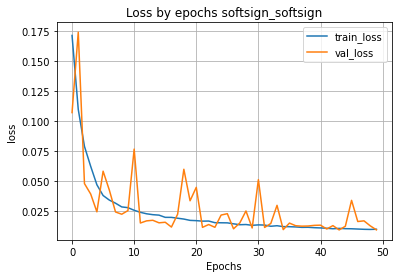

los: 0.006326410453766584
accuracy: 0.9980915784835815
--------------------
softsign _ sigmoid :


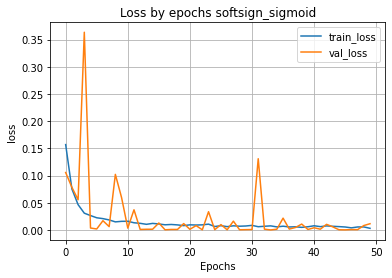

los: 0.0014080869732424617
accuracy: 0.9980915784835815
--------------------
sigmoid _ softsign :


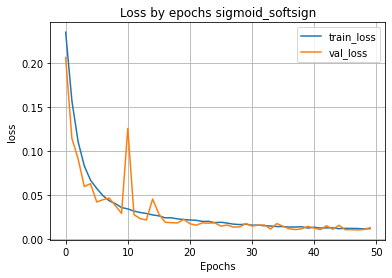

los: 0.009108015336096287
accuracy: 0.9982824325561523
--------------------
sigmoid _ sigmoid :


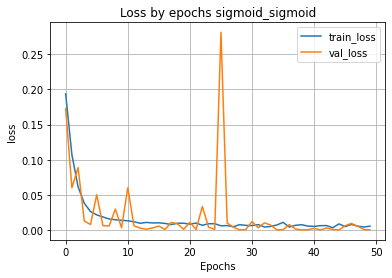

los: 0.0014339883346110582
accuracy: 0.99885493516922
--------------------


In [29]:
from threading import active_count
activation_list = ['softsign', 'sigmoid']
los_list_50epochs_1side_layers = []
accuracy_list_50epochs_1side_layers = []
model_list_50epochs_1side_layers = []
model_predict_list = []


for i in range(len(activation_list)):
  time_spis_los = []
  time_spis_accuracy = []
  time_spis_model = []
  time_predict_list = []
  for j in range(len(activation_list)):
        # 1. создаем модель - объявляем ее объектом класса Sequential
        model_binary_1layer = Sequential()
        # 2. добавляем выходной слой
        model_binary_1layer.add(Dense( units=100, input_dim=number_input_parameters, activation=activation_list[i]))
        model_binary_1layer.add(Dense(units=1, activation=activation_list[j]))
        # 3. компилируем модель
        model_binary_1layer.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

        H = model_binary_1layer.fit(X_train_numpy, y_train_numpy, validation_split=0.01, epochs=50)
        time_spis_model.append(H)

        # Оценка качества работы модели на тестовых данных
        scores = model_binary_1layer.evaluate(X_test_numpy, y_test_numpy)
        time_spis_los.append(scores[0])
        time_spis_accuracy.append(scores[1])
        time_predict_list.append(model_binary_1layer.predict(X_test))

  los_list_50epochs_1side_layers.append(time_spis_los)
  accuracy_list_50epochs_1side_layers.append(time_spis_accuracy)
  model_list_50epochs_1side_layers.append(time_spis_model)
  model_predict_list.append(time_predict_list)

for i in range(len(activation_list)):
    for j in range(len(activation_list)):
      print(activation_list[i], '_', activation_list[j], ':')

      plt.plot(model_list_50epochs_1side_layers[i][j].history['loss'])
      plt.plot(model_list_50epochs_1side_layers[i][j].history['val_loss'])
      plt.grid()
      plt.xlabel('Epochs')
      plt.ylabel('loss')
      plt.legend(['train_loss', 'val_loss'])
      plt.title('Loss by epochs ' + activation_list[i] + '_' + activation_list[j])
      plt.show()

      print('los: '+ str(los_list_50epochs_1side_layers[i][j]))
      print('accuracy: ' + str(accuracy_list_50epochs_1side_layers[i][j]))

      true_labels = np.argmax(y_test, axis=1)
      predicted_labels = model_predict_list[i][j]
      try:
        conf_matrix = confusion_matrix(true_labels, predicted_labels)
        print(conf_matrix)
      except:
        pass
      print('-'*20)

In [30]:
import math 
spis = []
true_clas = 0
false_clas = 0
print(len(true_labels))
spis_labels = model_predict_list[1][0]
for i in range(len(spis_labels)):
    print(np.around(spis_labels[i][0]), '-', y_test_numpy[i])
    spis.append(spis_labels[i][0])
    if (np.around(spis_labels[i][0]) == y_test_numpy[i][0]):
        true_clas = true_clas + 1
    else:
        false_clas = false_clas + 1
print(true_clas)
print(false_clas)
conf_matrix = confusion_matrix(y_test_numpy, np.around(spis))
print(conf_matrix)

Выходные данные были обрезаны до нескольких последних строк (5000).
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
1.0 - [1.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
-0.0 - [0.]
1.

### Бинарная метрика без скрытых слоев
### Функция активации sigmoid
### Функция ошибки binary_crossentropy
(100 эпох)

Epoch 1/100
181/181 [==============================] - 3s 14ms/step - loss: 0.0035 - accuracy: 0.9958 - val_loss: 0.0018 - val_accuracy: 0.9969
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9903 - val_loss: 0.0021 - val_accuracy: 0.9969
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9901 - val_loss: 3.8681e-04 - val_accuracy: 1.0000
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9931 - val_loss: 0.0040 - val_accuracy: 0.9938
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9936 - val_loss: 0.0052 - val_accuracy: 0.9938
Epoch 6/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9899 - val_loss: 0.0013 - val_accuracy: 0.9984
Epoch 7/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9918 - val_loss: 0.0010 - val_accuracy: 0

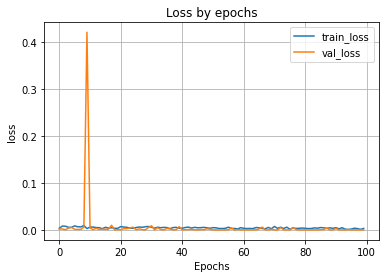

164/164 [==============================] - 0s 1ms/step - loss: 5.0800e-04 - accuracy: 0.9994
Loss on test data: 0.0005080001428723335
Accuracy on test data: 0.9994274973869324


In [31]:
H_1h = model_binary_1layer.fit(X_train_numpy, y_train_numpy, validation_split=0.1, epochs=100)

# вывод графика ошибки по эпохам
plt.plot(H_1h.history['loss'])
plt.plot(H_1h.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_binary_1layer.evaluate(X_test_numpy, y_test_numpy)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

### Бинарная метрика без скрытых слоев
### Функция активации sigmoid
### Функция ошибки mean_squared_error
(20 эпох)

### Бинарная метрика без скрытых слоев
### Функция активации sigmoid
### Функция ошибки mean_squared_error
(100 эпох)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               34600     
                                                                 
 dense_31 (Dense)            (None, 80)                8080      
                                                                 
 dense_32 (Dense)            (None, 80)                6480      
                                                                 
 dense_33 (Dense)            (None, 1)                 81        
                                                                 
Total params: 49,241
Trainable params: 49,241
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
199/199 [==============================] - 1s 3ms/step - loss: 0.1800 - binary_accuracy: 0.7272 - val_loss: 0.2478 - val_binary_accuracy: 0.6615
Epoch 2/20
199/199 [

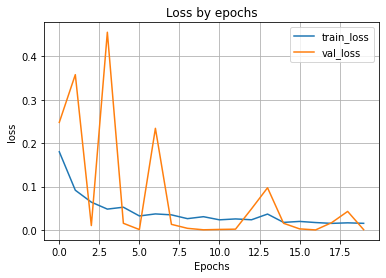

164/164 [==============================] - 0s 2ms/step - loss: 0.0053 - binary_accuracy: 0.9941
Loss on test data: 0.005279171280562878
Accuracy on test data: 0.9940839409828186


In [32]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model_binary_layers = Sequential()
# 2. добавляем выходной слой
model_binary_layers.add(Dense(units=100, input_dim=number_input_parameters, activation='sigmoid'))
model_binary_layers.add(Dense(units=80, activation='linear'))
model_binary_layers.add(Dense(units=80, activation='sigmoid'))
model_binary_layers.add(Dense(units=1, activation='sigmoid'))
# 3. компилируем модель
model_binary_layers.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['binary_accuracy'])

# вывод информации об архитектуре модели
print(model_binary_layers.summary())

H = model_binary_layers.fit(X_train_numpy, y_train_numpy, validation_split=0.01, epochs=20)

# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_binary_layers.evaluate(X_test_numpy, y_test_numpy)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])